In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

class StationaryBandit:    
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        # Fixed true action values (sampled from N(0, 1))
        self.q_true = np.random.normal(0, 1, n_arms)
    
    def reward(self, action):
        # Return reward: N(q*(a), 1)
        return np.random.normal(self.q_true[action], 1)
    
    def optimal_action(self):
        # Highest true value action
        return np.argmax(self.q_true)

In [3]:
def run_naive(steps=10000, runs=500):
    """
    Naive algorithm: Greedy approach (always exploit current best estimate)
    """
    n_arms = 10
    avg_rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for run in range(runs):
        bandit = StationaryBandit(n_arms)
        Q = np.zeros(n_arms)       # Estimated values
        N = np.zeros(n_arms)       # Action counts
        
        for t in range(steps):
            # Naive / Greedy selection: argmax Q(a)
            # Random tie-breaking is important for initial steps where Q=0
            max_q = np.max(Q)
            actions_with_max_q = np.where(Q == max_q)[0]
            action = np.random.choice(actions_with_max_q)
            
            # Get reward
            reward = bandit.reward(action)
            avg_rewards[t] += reward
            
            # Track optimal
            if action == bandit.optimal_action():
                optimal_actions[t] += 1
            
            # Update Q
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]
            
    return avg_rewards / runs, optimal_actions / runs

def run_epsilon_greedy(epsilon=0.1, steps=10000, runs=500):
    """
    Epsilon-greedy algorithm for comparison
    """
    n_arms = 10
    avg_rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for run in range(runs):
        bandit = StationaryBandit(n_arms)
        Q = np.zeros(n_arms)
        N = np.zeros(n_arms)
        
        for t in range(steps):
            if np.random.rand() < epsilon:
                action = np.random.randint(n_arms)
            else:
                max_q = np.max(Q)
                actions_with_max_q = np.where(Q == max_q)[0]
                action = np.random.choice(actions_with_max_q)
            
            reward = bandit.reward(action)
            avg_rewards[t] += reward
            
            if action == bandit.optimal_action():
                optimal_actions[t] += 1
            
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]
    
    return avg_rewards / runs, optimal_actions / runs

Running Naive (Greedy) Algorithm (300 runs, 5000 steps)...
Running Epsilon-Greedy (ε=0.1) for comparison...


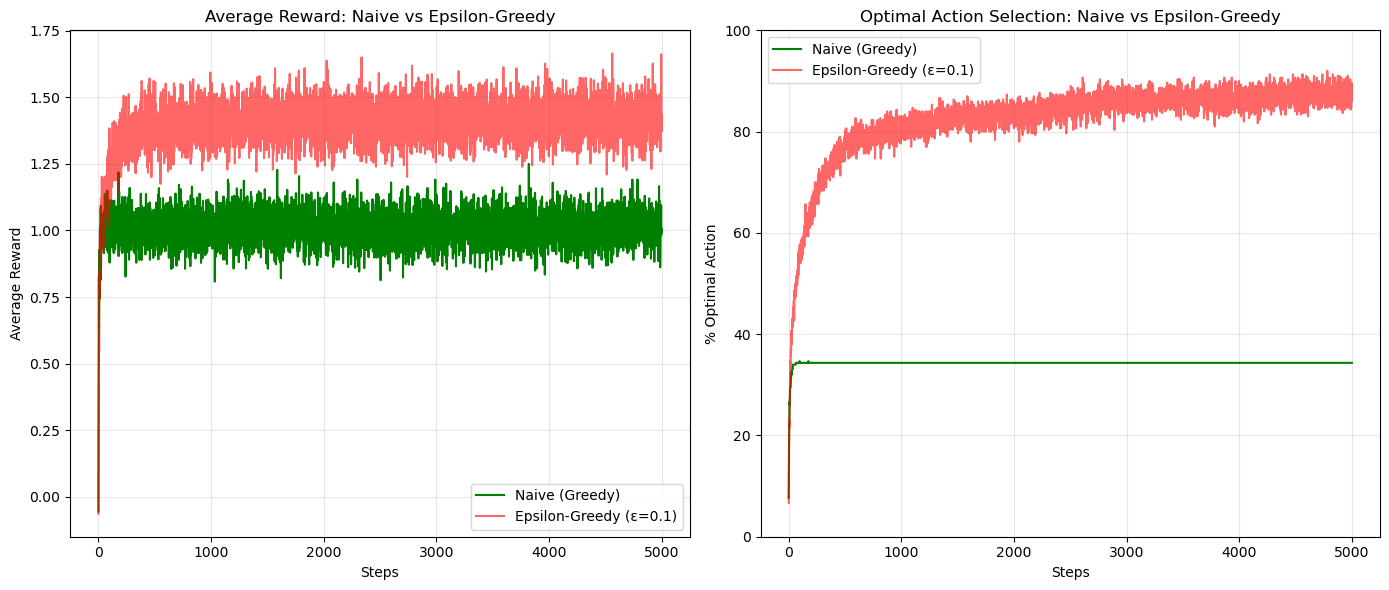

In [4]:
# Run Experiments
# Using slightly fewer runs/steps than Assignment 5 for speed, but enough for smooth plots
steps = 5000
runs = 300

print(f"Running Naive (Greedy) Algorithm ({runs} runs, {steps} steps)...")
rewards_naive, optimal_naive = run_naive(steps=steps, runs=runs)

print(f"Running Epsilon-Greedy (ε=0.1) for comparison...")
rewards_eg, optimal_eg = run_epsilon_greedy(epsilon=0.1, steps=steps, runs=runs)

# Plotting
plt.figure(figsize=(14, 6))

# Plot 1: Average Reward
plt.subplot(1, 2, 1)
plt.plot(rewards_naive, label='Naive (Greedy)', color='green')
plt.plot(rewards_eg, label='Epsilon-Greedy (ε=0.1)', color='red', alpha=0.6)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward: Naive vs Epsilon-Greedy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: % Optimal Action
plt.subplot(1, 2, 2)
plt.plot(optimal_naive * 100, label='Naive (Greedy)', color='green')
plt.plot(optimal_eg * 100, label='Epsilon-Greedy (ε=0.1)', color='red', alpha=0.6)
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('Optimal Action Selection: Naive vs Epsilon-Greedy')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()